# Predicting Molecular Properties ([Kaggle](https://www.kaggle.com/c/champs-scalar-coupling))
## Can you measure the magnetic interactions between a pair of atoms? 
### GitHub repository: https://github.com/comchem/Predicting-Molecular-Properties

### Project Leader : Min-seok Kye

In [0]:
from google.colab import files
files.upload()

#from google.colab import auth
#auth.authenticate_user()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"comchem","key":"eaac47d377688c05b7e1b9fbb9bf3d8a"}'}

In [0]:
!ls -lha

total 322M
drwxr-xr-x 1 root root 4.0K Jul 27 02:43  .
drwxr-xr-x 1 root root 4.0K Jul 27 00:05  ..
drwxr-xr-x 1 root root 4.0K Jul 19 16:14  .config
drwxr-xr-x 2 root root 4.0K Jul 27 00:17  data
-rw-r--r-- 1 root root 966K Jul 27 00:17  dipole_moments.csv.zip
-rw-r--r-- 1 root root   63 Jul 27 01:35 'kaggle (1).json'
-rw-r--r-- 1 root root   63 Jul 27 02:43 'kaggle (2).json'
-rw-r--r-- 1 root root   63 Jul 27 00:07  kaggle.json
-rw-r--r-- 1 root root  50M Jul 27 00:17  magnetic_shielding_tensors.csv.zip
-rw-r--r-- 1 root root 9.3M Jul 27 00:17  mulliken_charges.csv.zip
-rw-r--r-- 1 root root 498K Jul 27 00:17  potential_energy.csv.zip
drwxr-xr-x 1 root root 4.0K Jul 19 16:14  sample_data
-rw-r--r-- 1 root root 5.4M Jul 27 00:17  sample_submission.csv.zip
-rw-r--r-- 1 root root  87M Jul 27 00:17  scalar_coupling_contributions.csv.zip
-rw-r--r-- 1 root root  49M Jul 27 00:17  structures.csv.zip
-rw-r--r-- 1 root root  63M Jul 27 00:17  structures.zip
-rw-r--r-- 1 root root  14M Jul 27 

In [0]:
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [0]:
!kaggle competitions download -c champs-scalar-coupling

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
structures.zip: Skipping, found more recently modified local copy (use --force to force download)
structures.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
scalar_coupling_contributions.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
potential_energy.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
mulliken_charges.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
magnetic_shielding_tensors.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
dipole_moments.csv.zip: Skipping, found mor

In [0]:
!unzip 'dipole_moments.csv.zip' -d ./data 
!unzip 'magnetic_shielding_tensors.csv.zip' -d ./data 
!unzip 'mulliken_charges.csv.zip' -d ./data 
!unzip 'potential_energy.csv.zip' -d ./data 
!unzip 'scalar_coupling_contributions.csv.zip' -d ./data 
!unzip 'structures.csv.zip' -d ./data 
!unzip 'test.csv.zip' -d ./data 
!unzip 'train.csv.zip' -d ./data 

Archive:  dipole_moments.csv.zip
replace ./data/dipole_moments.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

KeyboardInterrupt: ignored

In [0]:
import pandas as pd

In [0]:
dt = pd.read_csv('./data/train.csv', index_col=0)
dt.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant
id,,,,,
0,dsgdb9nsd_000001,1,0,1JHC,84.8076
1,dsgdb9nsd_000001,1,2,2JHH,-11.2570
2,dsgdb9nsd_000001,1,3,2JHH,-11.2548
3,dsgdb9nsd_000001,1,4,2JHH,-11.2543
4,dsgdb9nsd_000001,2,0,1JHC,84.8074


In [0]:
dt.dtypes

molecule_name                object
atom_index_0                  int64
atom_index_1                  int64
type                         object
scalar_coupling_constant    float64
dtype: object

In [0]:
dt.isna().sum()

molecule_name               0
atom_index_0                0
atom_index_1                0
type                        0
scalar_coupling_constant    0
dtype: int64

In [0]:
dt = pd.DataFrame(dt, columns = ['scalar_coupling_constant', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type'])
dt.head(10)

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type
id,,,,,
0,84.8076,dsgdb9nsd_000001,1,0,1JHC
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH
4,84.8074,dsgdb9nsd_000001,2,0,1JHC
5,-11.2541,dsgdb9nsd_000001,2,3,2JHH
6,-11.2548,dsgdb9nsd_000001,2,4,2JHH
7,84.8093,dsgdb9nsd_000001,3,0,1JHC
8,-11.2543,dsgdb9nsd_000001,3,4,2JHH


In [0]:
dstruct = pd.read_csv('./data/structures.csv')
dstruct.head(5)

,molecule_name,atom_index,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [0]:
dstruct0 = dstruct.rename(columns={"atom_index":"atom_index_0"})
dstruct0.head()

,molecule_name,atom_index_0,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [0]:
dstruct1 = dstruct.rename(columns={"atom_index":"atom_index_1"})
dstruct1.head()

,molecule_name,atom_index_1,atom,x,y,z
0,dsgdb9nsd_000001,0,C,-0.012698,1.085804,0.008001
1,dsgdb9nsd_000001,1,H,0.002150,-0.006031,0.001976
2,dsgdb9nsd_000001,2,H,1.011731,1.463751,0.000277
3,dsgdb9nsd_000001,3,H,-0.540815,1.447527,-0.876644
4,dsgdb9nsd_000001,4,H,-0.523814,1.437933,0.906397


In [0]:
dscalar = pd.read_csv('./data/scalar_coupling_contributions.csv')
dscalar.head(10)

,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso
0,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010
1,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013
5,dsgdb9nsd_000001,2,3,2JHH,-11.0317,0.352932,2.85856,-3.433950
6,dsgdb9nsd_000001,2,4,2JHH,-11.0324,0.352943,2.85853,-3.433870
7,dsgdb9nsd_000001,3,0,1JHC,83.0241,0.254634,1.25856,0.272012
8,dsgdb9nsd_000001,3,4,2JHH,-11.0319,0.352943,2.85856,-3.433930
9,dsgdb9nsd_000001,4,0,1JHC,83.0243,0.254628,1.25856,0.272012


In [0]:
dpotential = pd.read_csv('./data/potential_energy.csv')
dpotential.head(5)

,molecule_name,potential_energy
0,dsgdb9nsd_000001,-40.52368
1,dsgdb9nsd_000002,-56.56025
2,dsgdb9nsd_000003,-76.42608
3,dsgdb9nsd_000005,-93.42849
4,dsgdb9nsd_000007,-79.83869


In [0]:
dmulliken = pd.read_csv('./data/mulliken_charges.csv')
dmulliken.head(5)

,molecule_name,atom_index,mulliken_charge
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [0]:
dmulliken0 = dmulliken.rename(columns={"atom_index":"atom_index_0","mulliken_charge":"mulliken_charge_0"})
dmulliken0.head()

,molecule_name,atom_index_0,mulliken_charge_0
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [0]:
dmulliken1 = dmulliken.rename(columns={"atom_index":"atom_index_1","mulliken_charge":"mulliken_charge_1"})
dmulliken1.head()

,molecule_name,atom_index_1,mulliken_charge_1
0,dsgdb9nsd_000001,0,-0.535689
1,dsgdb9nsd_000001,1,0.133921
2,dsgdb9nsd_000001,2,0.133922
3,dsgdb9nsd_000001,3,0.133923
4,dsgdb9nsd_000001,4,0.133923


In [0]:
dshielding = pd.read_csv('./data/magnetic_shielding_tensors.csv')
dshielding.head()

,molecule_name,atom_index,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [0]:
dshielding0 = dshielding.rename(columns={"atom_index":"atom_index_0"})
dshielding0.head()

,molecule_name,atom_index_0,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [0]:
dshielding1 = dshielding.rename(columns={"atom_index":"atom_index_1"})
dshielding1.head()

,molecule_name,atom_index_1,XX,YX,ZX,XY,YY,ZY,XZ,YZ,ZZ
0,dsgdb9nsd_000001,0,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,dsgdb9nsd_000001,1,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,dsgdb9nsd_000001,2,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
3,dsgdb9nsd_000001,3,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
4,dsgdb9nsd_000001,4,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013


In [0]:
ddipole = pd.read_csv('./data/dipole_moments.csv')
ddipole.head()

,molecule_name,X,Y,Z
0,dsgdb9nsd_000001,0.0000,0.0,0.0000
1,dsgdb9nsd_000002,-0.0002,0.0,1.6256
2,dsgdb9nsd_000003,0.0000,0.0,-1.8511
3,dsgdb9nsd_000005,0.0000,0.0,-2.8937
4,dsgdb9nsd_000007,0.0000,0.0,0.0000


In [0]:
tidy_df1 = pd.merge(dt, dscalar, how='left', on=['molecule_name', 'atom_index_0','atom_index_1'], validate="one_to_many")
tidy_df1.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type_x,type_y,fc,sd,pso,dso
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,1JHC,83.0224,0.254579,1.25862,0.272010
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,2JHH,-11.0347,0.352978,2.85839,-3.433600
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,2JHH,-11.0325,0.352944,2.85852,-3.433870
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,2JHH,-11.0319,0.352934,2.85855,-3.433930
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,1JHC,83.0222,0.254585,1.25861,0.272013


In [0]:
tidy_df2 = pd.merge(tidy_df1, dshielding0, how='left', on=['molecule_name', 'atom_index_0'])
tidy_df2 = tidy_df2.rename(columns = {"type_x":"type", "XX":"XX0", "YX":"YX0", "ZX":"ZX0", "XY":"XY0", "YY":"YY0", "ZY":"ZY0", "XZ":"XZ0", "YZ":"YZ0", "ZZ":"ZZ0"})
tidy_df2 = tidy_df2.drop(columns='type_y')
tidy_df2.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967


In [0]:
tidy_df3 = pd.merge(tidy_df2, dshielding1, how='left', on = ['molecule_name', 'atom_index_1'])
tidy_df3 = tidy_df3.rename(columns = {"XX":"XX1", "YX":"YX1", "ZX":"ZX1", "XY":"XY1", "YY":"YY1", "ZY":"ZY1", "XZ":"XZ1", "YZ":"YZ1", "ZZ":"ZZ1"})
tidy_df3.head(10)

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0,XX1,YX1,ZX1,XY1,YY1,ZY1,XZ1,YZ1,ZZ1
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
5,-11.2541,dsgdb9nsd_000001,2,3,2JHH,-11.0317,0.352932,2.85856,-3.433950,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579
6,-11.2548,dsgdb9nsd_000001,2,4,2JHH,-11.0324,0.352943,2.85853,-3.433870,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
7,84.8093,dsgdb9nsd_000001,3,0,1JHC,83.0241,0.254634,1.25856,0.272012,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170
8,-11.2543,dsgdb9nsd_000001,3,4,2JHH,-11.0319,0.352943,2.85856,-3.433930,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013
9,84.8095,dsgdb9nsd_000001,4,0,1JHC,83.0243,0.254628,1.25856,0.272012,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170


In [0]:
tidy_df4 = pd.merge(tidy_df3, dstruct0, how = 'left', on = ['molecule_name', 'atom_index_0'])
tidy_df4 = tidy_df4.rename(columns = {"atom":"atom0","x":"x0", "y":"y0", "z":"z0"})
tidy_df4.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0,XX1,YX1,ZX1,XY1,YY1,ZY1,XZ1,YZ1,ZZ1,atom0,x0,y0,z0
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,0.002150,-0.006031,0.001976
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,H,0.002150,-0.006031,0.001976
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,0.002150,-0.006031,0.001976
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,0.002150,-0.006031,0.001976
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,1.011731,1.463751,0.000277


In [0]:
tidy_df5 = pd.merge(tidy_df4, dstruct1, how = 'left', on = ['molecule_name', 'atom_index_1'])
tidy_df5 = tidy_df5.rename(columns = {"atom":"atom1","x":"x1", "y":"y1", "z":"z1"})
tidy_df5.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0,XX1,YX1,ZX1,XY1,YY1,ZY1,XZ1,YZ1,ZZ1,atom0,x0,y0,z0,atom1,x1,y1,z1
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001


In [0]:
tidy_df6 = pd.merge(tidy_df5, dpotential, how = 'left', on = ['molecule_name'])
tidy_df6.head(15)

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0,XX1,YX1,ZX1,XY1,YY1,ZY1,XZ1,YZ1,ZZ1,atom0,x0,y0,z0,atom1,x1,y1,z1,potential_energy
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,-40.52368
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,-40.52368
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,-40.52368
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,-40.52368
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,-40.52368
5,-11.2541,dsgdb9nsd_000001,2,3,2JHH,-11.0317,0.352932,2.85856,-3.433950,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,1.011731,1.463751,0.000277,H,-0.540815,1.447527,-0.876644,-40.52368
6,-11.2548,dsgdb9nsd_000001,2,4,2JHH,-11.0324,0.352943,2.85853,-3.433870,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,1.011731,1.463751,0.000277,H,-0.523814,1.437933,0.906397,-40.52368
7,84.8093,dsgdb9nsd_000001,3,0,1JHC,83.0241,0.254634,1.25856,0.272012,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,-0.540815,1.447527,-0.876644,C,-0.012698,1.085804,0.008001,-40.52368
8,-11.2543,dsgdb9nsd_000001,3,4,2JHH,-11.0319,0.352943,2.85856,-3.433930,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,-0.540815,1.447527,-0.876644,H,-0.523814,1.437933,0.906397,-40.52368
9,84.8095,dsgdb9nsd_000001,4,0,1JHC,83.0243,0.254628,1.25856,0.272012,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,-0.523814,1.437933,0.906397,C,-0.012698,1.085804,0.008001,-40.52368


In [0]:
tidy_df7 = pd.merge(tidy_df6, dmulliken0, how = 'left', on = ['molecule_name', 'atom_index_0'])
tidy_df8 = pd.merge(tidy_df7, dmulliken1, how = 'left', on = ['molecule_name', 'atom_index_1'])
tidy_df8.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0,XX1,YX1,ZX1,XY1,YY1,ZY1,XZ1,YZ1,ZZ1,atom0,x0,y0,z0,atom1,x1,y1,z1,potential_energy,mulliken_charge_0,mulliken_charge_1
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,-40.52368,0.133921,-0.535689
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,-40.52368,0.133921,0.133922
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,-40.52368,0.133921,0.133923
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,-40.52368,0.133921,0.133923
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,-40.52368,0.133922,-0.535689


In [0]:
tidy_df = pd.merge(tidy_df8, ddipole, how = 'left', on = ['molecule_name'])
tidy_df.head()

,scalar_coupling_constant,molecule_name,atom_index_0,atom_index_1,type,fc,sd,pso,dso,XX0,YX0,ZX0,XY0,YY0,ZY0,XZ0,YZ0,ZZ0,XX1,YX1,ZX1,XY1,YY1,ZY1,XZ1,YZ1,ZZ1,atom0,x0,y0,z0,atom1,x1,y1,z1,potential_energy,mulliken_charge_0,mulliken_charge_1,X,Y,Z
0,84.8076,dsgdb9nsd_000001,1,0,1JHC,83.0224,0.254579,1.25862,0.272010,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,0.002150,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,-40.52368,0.133921,-0.535689,0.0,0.0,0.0
1,-11.2570,dsgdb9nsd_000001,1,2,2JHH,-11.0347,0.352978,2.85839,-3.433600,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,H,0.002150,-0.006031,0.001976,H,1.011731,1.463751,0.000277,-40.52368,0.133921,0.133922,0.0,0.0,0.0
2,-11.2548,dsgdb9nsd_000001,1,3,2JHH,-11.0325,0.352944,2.85852,-3.433870,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.5172,4.1086,1.2723,4.1088,33.9068,1.6950,1.2724,1.6951,28.9579,H,0.002150,-0.006031,0.001976,H,-0.540815,1.447527,-0.876644,-40.52368,0.133921,0.133923,0.0,0.0,0.0
3,-11.2543,dsgdb9nsd_000001,1,4,2JHH,-11.0319,0.352934,2.85855,-3.433930,31.3410,-1.2317,4.0544,-1.2317,28.9546,-1.7173,4.0546,-1.7173,34.0861,31.4029,-4.0942,-1.1793,-4.0944,34.0776,1.6259,-1.1795,1.6260,28.9013,H,0.002150,-0.006031,0.001976,H,-0.523814,1.437933,0.906397,-40.52368,0.133921,0.133923,0.0,0.0,0.0
4,84.8074,dsgdb9nsd_000001,2,0,1JHC,83.0222,0.254585,1.25861,0.272013,31.5814,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,195.3150,0.0000,-0.0001,0.0000,195.3170,0.0007,-0.0001,0.0007,195.3170,H,1.011731,1.463751,0.000277,C,-0.012698,1.085804,0.008001,-40.52368,0.133922,-0.535689,0.0,0.0,0.0


In [0]:
#tidy_df.to_csv('./data/tidy_df.csv')

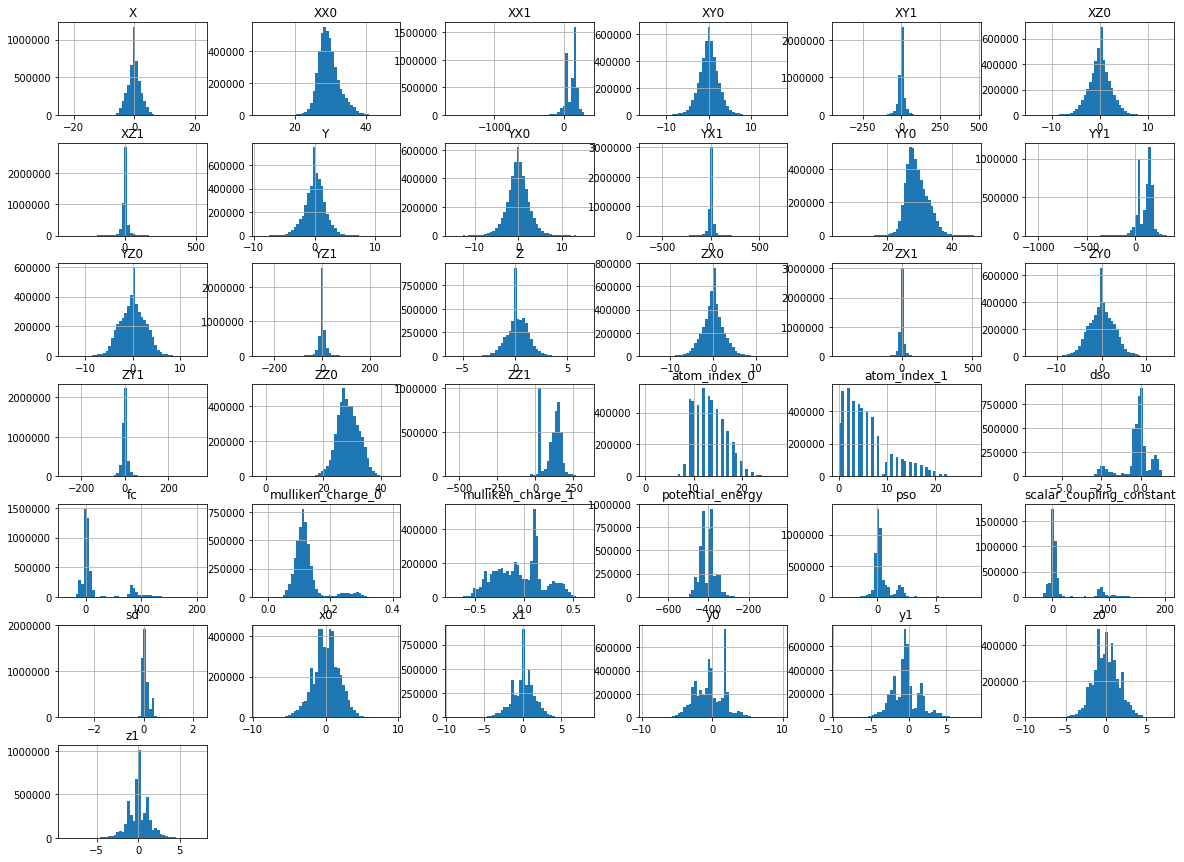

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
tidy_df.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
pd.get_dummies(tidy_df)

NameError: ignored

In [0]:
type_count_train = tidy_df['type'].value_counts()
print(type(type_count_train))
type_train = type_count_train/len(tidy_df)
type_train

<class 'pandas.core.series.Series'>


3JHC    0.324245
2JHC    0.244877
1JHC    0.152296
3JHH    0.126791
2JHH    0.081156
3JHN    0.035726
2JHN    0.025601
1JHN    0.009309
Name: type, dtype: float64

In [0]:
dft = pd.read_csv('./data/test.csv', index_col=0)
dft.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,molecule_name,atom_index_0,atom_index_1,type
id,,,,
4658147,dsgdb9nsd_000004,2,0,2JHC
4658148,dsgdb9nsd_000004,2,1,1JHC
4658149,dsgdb9nsd_000004,2,3,3JHH
4658150,dsgdb9nsd_000004,3,0,1JHC
4658151,dsgdb9nsd_000004,3,1,2JHC


In [0]:
type_count_test = dft['type'].value_counts()
type_test = type_count_test/len(dft)
type_test

3JHC    0.324081
2JHC    0.244713
1JHC    0.151907
3JHH    0.126693
2JHH    0.081071
3JHN    0.036166
2JHN    0.025713
1JHN    0.009657
Name: type, dtype: float64

In [0]:
df_dft = pd.DataFrame()
df_dft['train'] = type_train
df_dft['test'] = type_test
df_dft

,train,test
3JHC,0.324245,0.324081
2JHC,0.244877,0.244713
1JHC,0.152296,0.151907
3JHH,0.126791,0.126693
2JHH,0.081156,0.081071
3JHN,0.035726,0.036166
2JHN,0.025601,0.025713
1JHN,0.009309,0.009657


<Figure size 432x288 with 0 Axes>

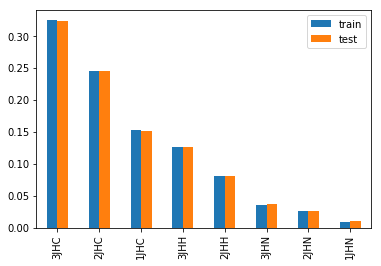

In [0]:
plt.figure();
df_dft.plot.bar()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(tidy_df, tidy_df["type"]):
    strat_train_set = tidy_df.loc[train_index]
    strat_test_set = tidy_df.loc[test_index]

In [0]:
len(strat_test_set)/(len(strat_train_set)+len(strat_test_set))

0.20000012880658338

In [0]:
type_strat_train = strat_train_set['type'].value_counts()/len(strat_train_set)
type_strat_test = strat_test_set['type'].value_counts()/len(strat_test_set)

df_dft['train_st'] = type_strat_train 
df_dft['test_st'] = type_strat_test
df_dft

,train,test,train_st,test_st
3JHC,0.324245,0.324081,0.324245,0.324245
2JHC,0.244877,0.244713,0.244877,0.244877
1JHC,0.152296,0.151907,0.152296,0.152295
3JHH,0.126791,0.126693,0.126791,0.126791
2JHH,0.081156,0.081071,0.081156,0.081156
3JHN,0.035726,0.036166,0.035726,0.035726
2JHN,0.025601,0.025713,0.025601,0.025601
1JHN,0.009309,0.009657,0.009309,0.009309


In [0]:
import numpy as np
np.random.seed(42)

In [0]:
from sklearn.preprocessing import OneHotEncoder

couple_type = tidy_df[['type']]
#print(couple_type.head())

cat_encoder = OneHotEncoder()
SC_cat_1hot = cat_encoder.fit_transform(couple_type)
SC_cat_1hot

<4658147x8 sparse matrix of type '<class 'numpy.float64'>'
	with 4658147 stored elements in Compressed Sparse Row format>

In [0]:
SC_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [0]:
a0_couple_type = tidy_df[['atom0']]
print(a0_couple_type.head())

atom0_cat_encoder = OneHotEncoder()
atom0_cat_1hot = atom0_cat_encoder.fit_transform(a0_couple_type)
atom0_cat_1hot

  atom0
0     H
1     H
2     H
3     H
4     H


<4658147x1 sparse matrix of type '<class 'numpy.float64'>'
	with 4658147 stored elements in Compressed Sparse Row format>

In [0]:
atom0_cat_1hot.toarray()

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [0]:
a1_couple_type = tidy_df[['atom1']]
print(a1_couple_type.head())

atom1_cat_encoder = OneHotEncoder()
atom1_cat_1hot = atom1_cat_encoder.fit_transform(a1_couple_type)
atom1_cat_1hot

  atom1
0     C
1     H
2     H
3     H
4     C


<4658147x3 sparse matrix of type '<class 'numpy.float64'>'
	with 4658147 stored elements in Compressed Sparse Row format>

In [0]:
print(cat_encoder.categories_)
print(atom0_cat_encoder.categories_)
print(atom1_cat_encoder.categories_)

[array(['1JHC', '1JHN', '2JHC', '2JHH', '2JHN', '3JHC', '3JHH', '3JHN'],
      dtype=object)]
[array(['H'], dtype=object)]
[array(['C', 'H', 'N'], dtype=object)]
